# Comparing rules of GSPACER on lia instances
Pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.display import display, HTML

In [4]:
fname='GSpacer.csv'
csm = pd.read_csv(fname)
csm = csm[csm["index"].str.startswith('chc-lia')]
# move timeout and unknown to maximal time
csm['time'].fillna(value=900, inplace=True)
csm['result'].fillna(value="timeout", inplace=True)
# show a snapshot of data for visual validation
csm.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_expand_pob_undef,SPACER_inductive_level,SPACER_max_cluster_size,SPACER_max_cvx_reduced_dim,SPACER_max_depth,SPACER_max_query_lvl,SPACER_need_sage,...,time_spacer_solve_propagate,time_spacer_solve_pt_must_reachable,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_merge,time_spacer_solve_reach_gen_merge_cvx_cls,time_spacer_solve_reach_gen_wide,time_spacer_solve_reach_is_reach
9,chc-lia-0000.smt2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN,...,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00
10,chc-lia-0001.smt2,NaN,9.0,NaN,22.0,5.0,1.0,24.0,24.0,NaN,...,0.02,NaN,0.13,0.01,0.02,0.00,0.04,0.00,0.04,0.01
11,chc-lia-0002.smt2,NaN,77.0,NaN,100.0,50.0,1.0,102.0,102.0,NaN,...,4.83,NaN,117.67,2.63,3.90,34.43,7.89,0.00,7.89,0.19
12,chc-lia-0003.smt2,NaN,NaN,NaN,NaN,3.0,NaN,5.0,5.0,NaN,...,0.00,NaN,0.05,0.00,0.01,0.01,0.00,NaN,0.00,NaN
13,chc-lia-0004.smt2,NaN,656.0,1301.0,199.0,98.0,3.0,199.0,199.0,62.0,...,25.23,NaN,436.34,7.72,11.38,0.08,187.86,0.08,187.86,1.32


In [5]:
# quick overview of solved/unsolved instances
csm[['result','index']].groupby(['result']).count()

,index
result,
sat,410
timeout,107
unsat,148


# Running without conjecture rule

In [7]:
fname = "csm-noconj.csv"
csmnoconj = pd.read_csv(fname)
csmnoconj['time'].fillna(value=900, inplace=True)
csmnoconj['result'].fillna(value="timeout", inplace=True)
csmnoconj[['result','index']].groupby(['result']).count()

,index
result,
sat,405
timeout,107
unknown,1
unsat,152


In [8]:
comb = pd.merge(csm, csmnoconj, on = "index", how = "inner")
#sanity check. Make sure they don't disagree
comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas_x,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size_x,SPACER_max_cvx_reduced_dim_x,SPACER_max_depth_x,SPACER_max_query_lvl_x,SPACER_need_sage_x,...,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_cluster_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_gen_merge_y,time_spacer_solve_reach_gen_merge_cvx_cls_y,time_spacer_solve_reach_gen_wide_y,time_spacer_solve_reach_is_reach_y


In [9]:
comb[['result_x', 'result_y', 'index']].groupby(['result_x', 'result_y']).count()

index
result_x result_y       
sat      sat         399
         timeout      11
timeout  sat           6
         timeout      94
         unknown       1
         unsat         6
unsat    timeout       2
         unsat       146

len(A): 410 	len(B): 405
No. values 399
Min val, A: 1.0 	B: 1.0
Max val, A: 199.0 	B: 143.0
Avg val, A: 17.53 	B: 17.71


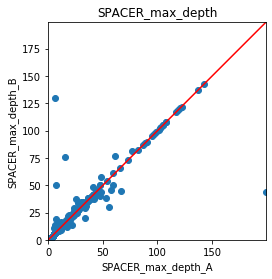

In [10]:
def preprocess(df, sat):  
    if sat == True:
        return df.query('result == "sat"')
    else:
        return df.query('result == "unsat"')
        
def compare_values(columns, df_A, df_B):
    vals_A = df_A[['index'] + list(columns)]
    vals_B = df_B[['index'] + list(columns)]
    merged = vals_A.merge(vals_B, how='inner', left_index=True, on='index')
    return merged

def scatter_values(column, df_A, df_B):
    vals = compare_values((column, ), df_A, df_B)
    xlabel = column + '_x'
    ylabel = column + '_y'
    
    xs = vals[xlabel]
    ys = vals[ylabel]
    
    print('len(A):', len(df_A), '\tlen(B):', len(df_B))
    print('No. values', len(xs))
    print('Min val, A:', min(xs), '\tB:', min(ys))
    print('Max val, A:', max(xs), '\tB:', max(ys))
    print('Avg val, A:', "{:0.2f}".format(np.mean(xs)), '\tB:', "{:0.2f}".format(np.mean(ys)))
    
    min_val = min(0, min(xs), min(ys))
    max_val = max(max(xs), max(ys))
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    plt.scatter(xs, ys)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(column + '_A')
    plt.ylabel(column + '_B')
    
    mid_x = np.linspace(min_val, max_val, 2)
    mid_y = mid_x
    plt.plot(mid_x, mid_y, 'r-')
    plt.title(column)
    
    plt.rcParams['figure.dpi'] = 160
    plt.draw()
    

chc_csm = preprocess(csm, True)
chc_base = preprocess(csmnoconj, True)

scatter_values('SPACER_max_depth', chc_csm, chc_base)

len(A): 410 	len(B): 405
No. values 399
Min val, A: 0.0 	B: 0.0
Max val, A: 588.28 	B: 544.04
Avg val, A: 41.63 	B: 40.96


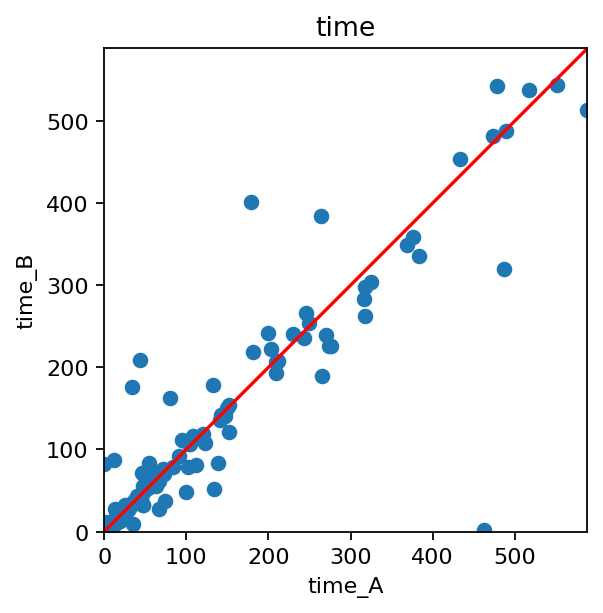

In [11]:
scatter_values('time', chc_csm, chc_base)

# Running without concretize rule

In [13]:
fname = "csmnoconcr.csv"
csmnoconcr = pd.read_csv(fname)
csmnoconcr['time'].fillna(value=900, inplace=True)
csmnoconcr['result'].fillna(value="timeout", inplace=True)
csmnoconcr[['result','index']].groupby(['result']).count()

,index
result,
sat,410
timeout,101
unsat,154


In [14]:
comb = pd.merge(csm, csmnoconcr, on = "index", how = "inner")
#sanity check. Make sure they don't disagree
comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas_x,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size_x,SPACER_max_cvx_reduced_dim_x,SPACER_max_depth_x,SPACER_max_query_lvl_x,SPACER_need_sage_x,...,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_cluster_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_gen_merge_y,time_spacer_solve_reach_gen_merge_cvx_cls_y,time_spacer_solve_reach_gen_wide_y,time_spacer_solve_reach_is_reach_y


In [15]:
comb[['result_x', 'result_y', 'index']].groupby(['result_x', 'result_y']).count()

index
result_x result_y       
sat      sat         400
         timeout      10
timeout  sat          10
         timeout      91
         unsat         6
unsat    unsat       148

len(A): 410 	len(B): 410
No. values 400
Min val, A: 1.0 	B: 1.0
Max val, A: 199.0 	B: 199.0
Avg val, A: 18.20 	B: 18.46


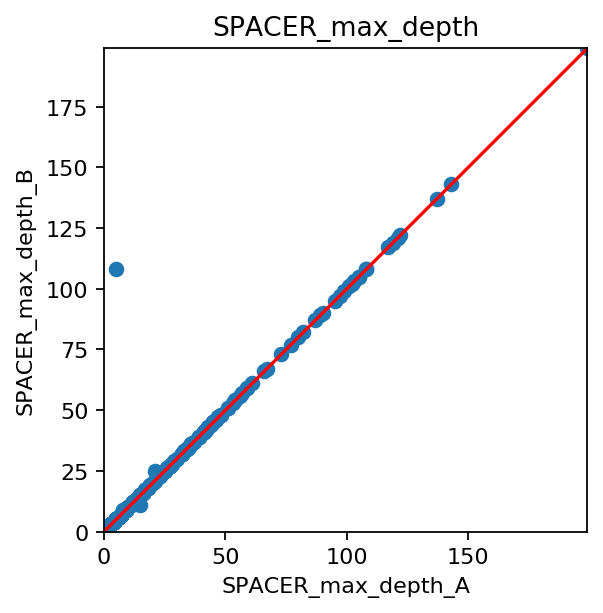

In [16]:
chc_csm = preprocess(csm, True)
chc_csm_no_concr = preprocess(csmnoconcr, True)

scatter_values('SPACER_max_depth', chc_csm, chc_csm_no_concr)

len(A): 410 	len(B): 410
No. values 400
Min val, A: 0.0 	B: 0.0
Max val, A: 588.28 	B: 488.41
Avg val, A: 46.85 	B: 38.76


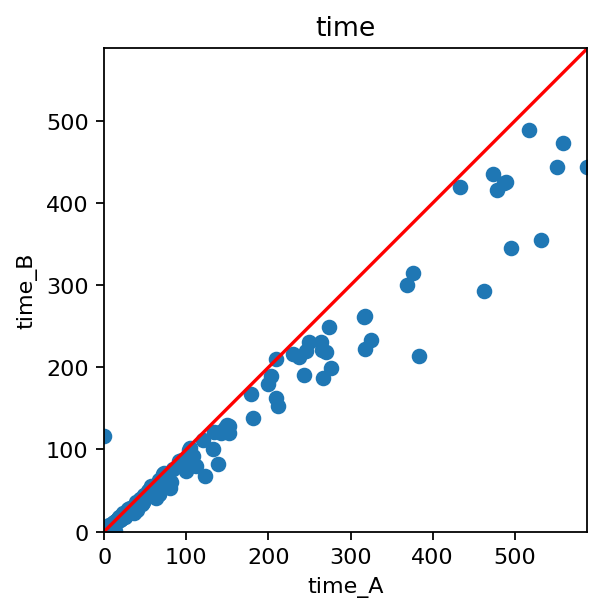

In [17]:
scatter_values('time', chc_csm, chc_csm_no_concr)

# Comparison with neither concretize nor conjecture

In [19]:
fname = "csm-nocc.csv"
csmnocc = pd.read_csv(fname)
csmnocc['time'].fillna(value=900, inplace=True)
csmnocc['result'].fillna(value="timeout", inplace=True)
csmnocc[['result','index']].groupby(['result']).count()

,index
result,
sat,398
timeout,114
unknown,1
unsat,152


In [20]:
comb = pd.merge(csm, csmnocc, on = "index", how = "inner")
#sanity check. Make sure they don't disagree
comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas_x,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size_x,SPACER_max_cvx_reduced_dim_x,SPACER_max_depth_x,SPACER_max_query_lvl_x,SPACER_need_sage_x,...,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_cluster_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_gen_merge_y,time_spacer_solve_reach_gen_merge_cvx_cls_y,time_spacer_solve_reach_gen_wide_y,time_spacer_solve_reach_is_reach_y


In [21]:
comb[['result_x', 'result_y', 'index']].groupby(['result_x', 'result_y']).count()

index
result_x result_y       
sat      sat         389
         timeout      21
timeout  sat           9
         timeout      91
         unknown       1
         unsat         6
unsat    timeout       2
         unsat       146

len(A): 410 	len(B): 398
No. values 389
Min val, A: 1.0 	B: 1.0
Max val, A: 199.0 	B: 143.0
Avg val, A: 17.69 	B: 18.12


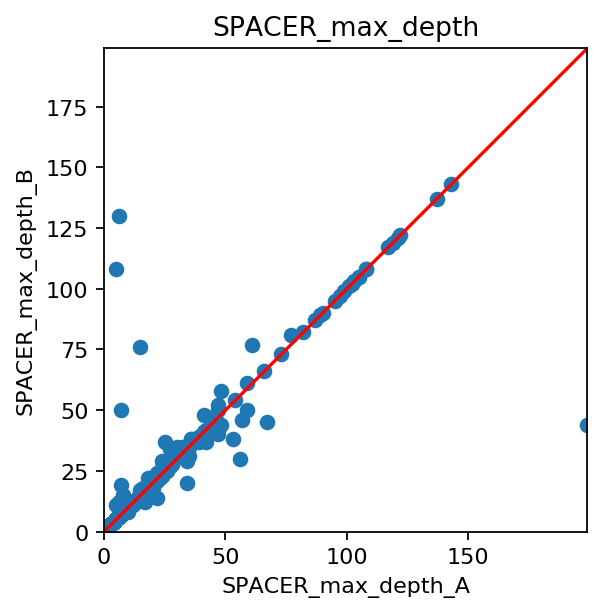

In [22]:
chc_csm = preprocess(csm, True)
chc_csm_no_cc = preprocess(csmnocc, True)

scatter_values('SPACER_max_depth', chc_csm, chc_csm_no_cc)

len(A): 410 	len(B): 398
No. values 389
Min val, A: 0.0 	B: 0.0
Max val, A: 588.28 	B: 549.89
Avg val, A: 42.51 	B: 42.09


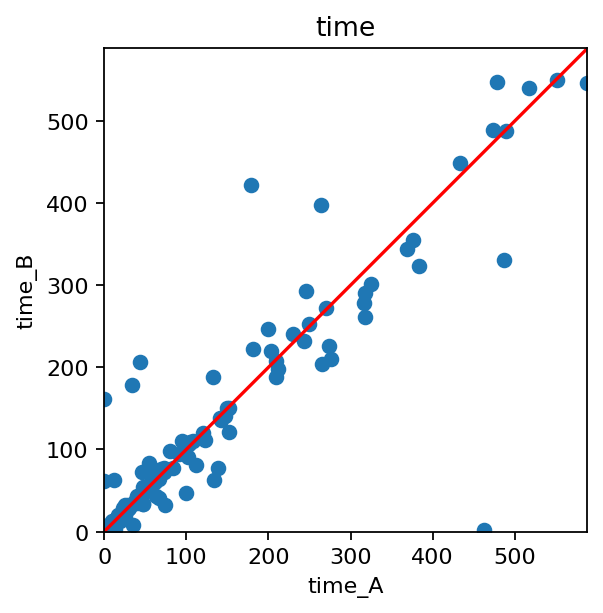

In [23]:
scatter_values('time', chc_csm, chc_csm_no_cc)